In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ess_de_org = pd.read_csv("ESS_R8_Germany.csv")

In [3]:
ess_de = ess_de_org.copy()

PRE-PROCESSING

I preprocessed only the political variables in this notebook. For the economical and social variables, I will use another notebook. 

1 - basinc

2    1119
3    1062
1     334
4     250
8      79
7       8
Name: basinc, dtype: int64


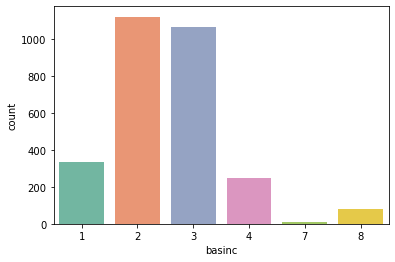

In [4]:
print(ess_de['basinc'].value_counts())
sns.countplot(x='basinc', data=ess_de, palette='Set2')
plt.show()

In [5]:
ess_de.loc[ess_de['basinc'] == 1, 'basinc'] = 0
ess_de.loc[ess_de['basinc'] == 2, 'basinc'] = 0
ess_de.loc[ess_de['basinc'] == 3, 'basinc'] = 1
ess_de.loc[ess_de['basinc'] == 4, 'basinc'] = 1

In [6]:
ess_de.loc[ess_de['basinc'] == 7, 'basinc'] = 3
ess_de.loc[ess_de['basinc'] == 8, 'basinc'] = 3

0    1453
1    1312
3      87
Name: basinc, dtype: int64


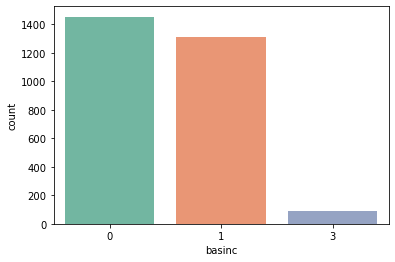

In [7]:
print(ess_de['basinc'].value_counts())
sns.countplot(x='basinc', data=ess_de, palette='Set2')
plt.show()

In [8]:
# replace half of the '3' values with '0' and the other half with '1'
threes = ess_de['basinc'] == 3
num_threes = sum(threes)
num_zeros = num_threes // 2
indices = ess_de.loc[threes].index
random_indices = np.random.choice(indices, size=num_zeros, replace=False)
ess_de.loc[random_indices, 'basinc'] = 0
ess_de.loc[indices.difference(random_indices), 'basinc'] = 1

0    1496
1    1356
Name: basinc, dtype: int64


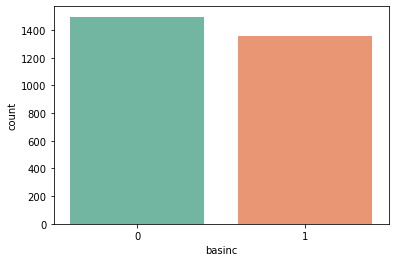

In [9]:
print(ess_de['basinc'].value_counts())
sns.countplot(x='basinc', data=ess_de, palette='Set2')
plt.show()

2 - nwspol

60      648
30      570
90      270
120     234
15      206
       ... 
1005      1
600       1
570       1
562       1
692       1
Name: nwspol, Length: 75, dtype: int64


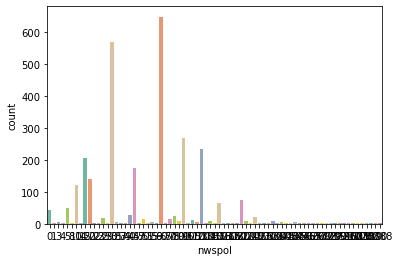

In [10]:
print(ess_de['nwspol'].value_counts())
sns.countplot(x='nwspol', data=ess_de, palette='Set2')
plt.show()

In [11]:
# Dropping the missing values from the column.

ess_de.drop(ess_de[(ess_de['nwspol'] == 7777) | (ess_de['nwspol'] == 8888) | (ess_de['nwspol'] == 9999)].index, inplace=True)


In [12]:
ess_de["nwspol"].count()

2851

In [13]:
#Creating a new dataframe with all variables. 

x_data = ess_de[['basinc', 'nwspol']]

In [14]:
x_data.describe()

basinc       nwspol
count  2851.000000  2851.000000
mean      0.475272    67.178885
std       0.499476    84.174861
min       0.000000     0.000000
25%       0.000000    30.000000
50%       0.000000    60.000000
75%       1.000000    90.000000
max       1.000000  1200.000000

3 - polintr

2    1238
3     826
1     702
4      84
8       1
Name: polintr, dtype: int64


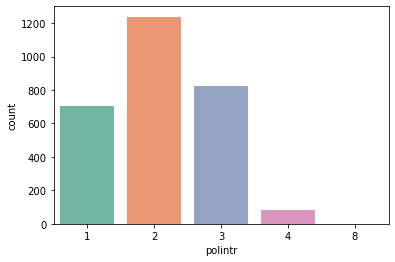

In [15]:
print(ess_de['polintr'].value_counts())
sns.countplot(x='polintr', data=ess_de, palette='Set2')
plt.show()

In [16]:
polintr = ess_de["polintr"]

In [17]:
ess_de.loc[ess_de['polintr'] == 1, 'polintr'] = 1
ess_de.loc[ess_de['polintr'] == 2, 'polintr'] = 1
ess_de.loc[ess_de['polintr'] == 3, 'polintr'] = 0
ess_de.loc[ess_de['polintr'] == 4, 'polintr'] = 0

In [18]:
print(ess_de['polintr'].value_counts())

1    1940
0     910
8       1
Name: polintr, dtype: int64


In [19]:
ess_de.loc[ess_de['polintr'] == 8, 'polintr'] = 1

In [20]:
print(ess_de['polintr'].value_counts())

1    1941
0     910
Name: polintr, dtype: int64


In [21]:
x_data.loc[:, 'polintr'] = ess_de['polintr'].values

/Users/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [22]:
x_data.describe()

basinc       nwspol      polintr
count  2851.000000  2851.000000  2851.000000
mean      0.475272    67.178885     0.680814
std       0.499476    84.174861     0.466243
min       0.000000     0.000000     0.000000
25%       0.000000    30.000000     0.000000
50%       0.000000    60.000000     1.000000
75%       1.000000    90.000000     1.000000
max       1.000000  1200.000000     1.000000

4 - vote

1    2113
2     371
3     357
8       6
7       4
Name: vote, dtype: int64


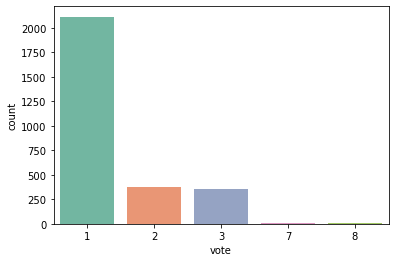

In [23]:
print(ess_de['vote'].value_counts())
sns.countplot(x='vote', data=ess_de, palette='Set2')
plt.show()

In [24]:
# Weighted distribution of missing values and turning the variable in

ess_de.loc[ess_de['vote'] == 7, 'vote'] = 3
ess_de.loc[ess_de['vote'] == 8, 'vote'] = 3

In [25]:
ess_de["vote"].value_counts()

1    2113
2     371
3     367
Name: vote, dtype: int64

In [26]:
ess_de.loc[ess_de['vote'] == 2, 'vote'] = 0

In [29]:
ess_de["vote"].value_counts()

1    2425
0     426
Name: vote, dtype: int64

In [28]:
# calculate the number of 3 values to replace with 0
num_replacements = int(len(ess_de[ess_de['vote'] == 3]) * 0.15)

# get the indices of the 3 values to replace with 0
replace_indices = np.random.choice(ess_de[ess_de['vote'] == 3].index, num_replacements, replace=False)

# replace the 3 values with 0 and 1
ess_de.loc[replace_indices, 'vote'] = 0
ess_de.loc[ess_de['vote'] == 3, 'vote'] = 1

In [30]:
x_data.describe()

basinc       nwspol      polintr
count  2851.000000  2851.000000  2851.000000
mean      0.475272    67.178885     0.680814
std       0.499476    84.174861     0.466243
min       0.000000     0.000000     0.000000
25%       0.000000    30.000000     0.000000
50%       0.000000    60.000000     1.000000
75%       1.000000    90.000000     1.000000
max       1.000000  1200.000000     1.000000

In [31]:
x_data['vote'] = ess_de['vote']

<ipython-input-31-1168e6a7e2e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_data['vote'] = ess_de['vote']


1    2425
0     426
Name: vote, dtype: int64


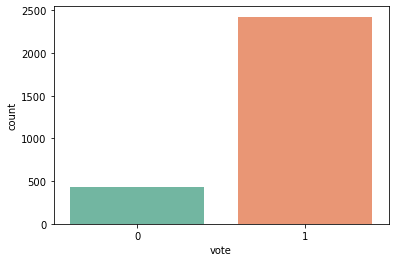

In [32]:
print(x_data['vote'].value_counts())
sns.countplot(x='vote', data=x_data, palette='Set2')
plt.show()

5 - sgnptit

0    1778
1    1073
Name: sgnptit, dtype: int64


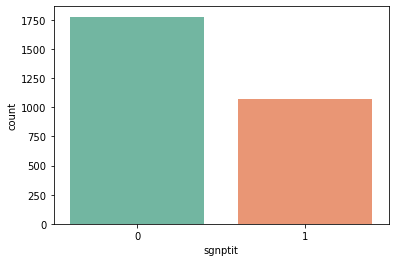

In [36]:
print(ess_de['sgnptit'].value_counts())
sns.countplot(x='sgnptit', data=ess_de, palette='Set2')
plt.show()

In [34]:
ess_de.loc[ess_de['sgnptit'] == 2, 'sgnptit'] = 0

In [35]:
ess_de.loc[ess_de['sgnptit'] == 8, 'sgnptit'] = 0

In [37]:
x_data["sgnptit"] = ess_de["sgnptit"]

<ipython-input-37-2159b3805f47>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_data["sgnptit"] = ess_de["sgnptit"]


0    1778
1    1073
Name: sgnptit, dtype: int64


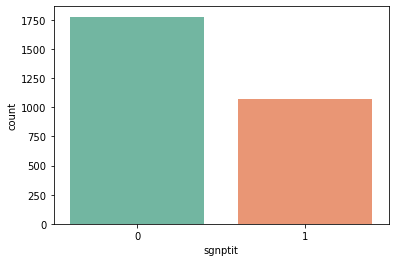

In [38]:
print(x_data['sgnptit'].value_counts())
sns.countplot(x='sgnptit', data=x_data, palette='Set2')
plt.show()

6 - pstplonl

0    2218
1     633
Name: pstplonl, dtype: int64


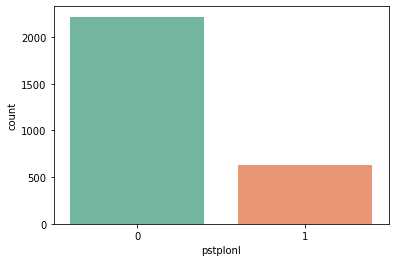

In [42]:
print(ess_de['pstplonl'].value_counts())
sns.countplot(x='pstplonl', data=ess_de, palette='Set2')
plt.show()

In [40]:
ess_de.loc[ess_de['pstplonl'] == 2, 'pstplonl'] = 0

In [41]:
ess_de.loc[ess_de['pstplonl'] == 8, 'pstplonl'] = 0

In [43]:
x_data["pstplonl"] = ess_de["pstplonl"]

<ipython-input-43-846c48f92326>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_data["pstplonl"] = ess_de["pstplonl"]


0    2218
1     633
Name: pstplonl, dtype: int64


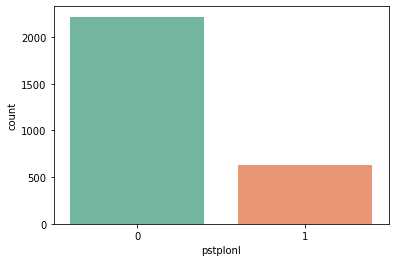

In [44]:
print(x_data['pstplonl'].value_counts())
sns.countplot(x='pstplonl', data=x_data, palette='Set2')
plt.show()

In [45]:
x_data.describe()

basinc       nwspol      polintr         vote      sgnptit  \
count  2851.000000  2851.000000  2851.000000  2851.000000  2851.000000   
mean      0.475272    67.178885     0.680814     0.850579     0.376359   
std       0.499476    84.174861     0.466243     0.356566     0.484557   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000    30.000000     0.000000     1.000000     0.000000   
50%       0.000000    60.000000     1.000000     1.000000     0.000000   
75%       1.000000    90.000000     1.000000     1.000000     1.000000   
max       1.000000  1200.000000     1.000000     1.000000     1.000000   

          pstplonl  
count  2851.000000  
mean      0.222027  
std       0.415682  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

7 - trstplt

5     574
3     410
4     399
6     360
2     281
0     259
7     245
1     148
8     119
9      21
10     15
88     14
77      6
Name: trstplt, dtype: int64


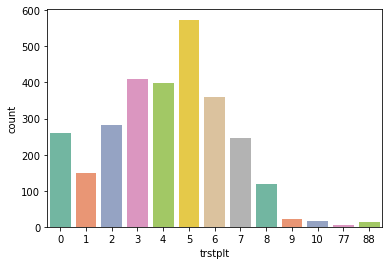

In [46]:
print(ess_de['trstplt'].value_counts())
sns.countplot(x='trstplt', data=ess_de, palette='Set2')
plt.show()

In [47]:
ess_de.loc[ess_de['trstplt'] == 1, 'trstplt'] = 0
ess_de.loc[ess_de['trstplt'] == 2, 'trstplt'] = 0
ess_de.loc[ess_de['trstplt'] == 3, 'trstplt'] = 0
ess_de.loc[ess_de['trstplt'] == 4, 'trstplt'] = 0
ess_de.loc[ess_de['trstplt'] == 6, 'trstplt'] = 1
ess_de.loc[ess_de['trstplt'] == 7, 'trstplt'] = 1
ess_de.loc[ess_de['trstplt'] == 8, 'trstplt'] = 1
ess_de.loc[ess_de['trstplt'] == 9, 'trstplt'] = 1
ess_de.loc[ess_de['trstplt'] == 10, 'trstplt'] = 1

0    1794
1    1057
Name: trstplt, dtype: int64


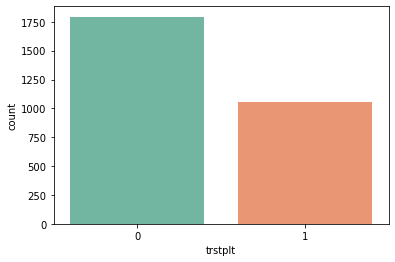

In [54]:
print(ess_de['trstplt'].value_counts())
sns.countplot(x='trstplt', data=ess_de, palette='Set2')
plt.show()

In [49]:
ess_de.loc[ess_de['trstplt'] == 88, 'trstplt'] = 5
ess_de.loc[ess_de['trstplt'] == 77, 'trstplt'] = 5

In [51]:
num_fives = (ess_de['trstplt'] == 5).sum()

# calculate the number of 5 values to replace with 0 and 1
num_replace_zero = num_fives // 2
num_replace_one = num_fives - num_replace_zero

# get the indices of the 5 values to replace
replace_indices_zero = np.random.choice(ess_de[ess_de['trstplt'] == 5].index, num_replace_zero, replace=False)
replace_indices_one = np.random.choice(ess_de[ess_de['trstplt'] == 5].index, num_replace_one, replace=False)

# replace the 5 values with 0 and 1
ess_de.loc[replace_indices_zero, 'trstplt'] = 0
ess_de.loc[replace_indices_one, 'trstplt'] = 1

In [53]:
ess_de.loc[ess_de['trstplt'] == 5, 'trstplt'] = 0

In [55]:
x_data["trstplt"] = ess_de["trstplt"]

<ipython-input-55-b81d4fe2c0e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_data["trstplt"] = ess_de["trstplt"]


In [67]:
x_data.describe()

basinc       nwspol      polintr         vote      sgnptit  \
count  2851.000000  2851.000000  2851.000000  2851.000000  2851.000000   
mean      0.475272    67.178885     0.680814     0.850579     0.376359   
std       0.499476    84.174861     0.466243     0.356566     0.484557   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000    30.000000     0.000000     1.000000     0.000000   
50%       0.000000    60.000000     1.000000     1.000000     0.000000   
75%       1.000000    90.000000     1.000000     1.000000     1.000000   
max       1.000000  1200.000000     1.000000     1.000000     1.000000   

          pstplonl      trstplt      trstprt  
count  2851.000000  2851.000000  2851.000000  
mean      0.222027     0.370747     0.361978  
std       0.415682     0.483090     0.480657  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000  
75%       0.000000     1.000000     1.000000  
max       1.000000     1.000000     1.000000

8 - trstprt

5     582
3     442
4     429
6     355
2     296
7     228
0     205
1     137
8     106
88     32
9      22
10     11
77      6
Name: trstprt, dtype: int64


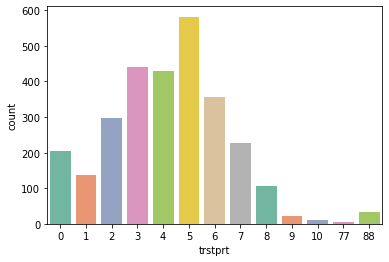

In [57]:
print(ess_de['trstprt'].value_counts())
sns.countplot(x='trstprt', data=ess_de, palette='Set2')
plt.show()

In [58]:
ess_de.loc[ess_de['trstprt'] == 1, 'trstprt'] = 0
ess_de.loc[ess_de['trstprt'] == 2, 'trstprt'] = 0
ess_de.loc[ess_de['trstprt'] == 3, 'trstprt'] = 0
ess_de.loc[ess_de['trstprt'] == 4, 'trstprt'] = 0
ess_de.loc[ess_de['trstprt'] == 6, 'trstprt'] = 1
ess_de.loc[ess_de['trstprt'] == 7, 'trstprt'] = 1
ess_de.loc[ess_de['trstprt'] == 8, 'trstprt'] = 1
ess_de.loc[ess_de['trstprt'] == 9, 'trstprt'] = 1
ess_de.loc[ess_de['trstprt'] == 10, 'trstprt'] = 1

0    1509
1     722
5     620
Name: trstprt, dtype: int64


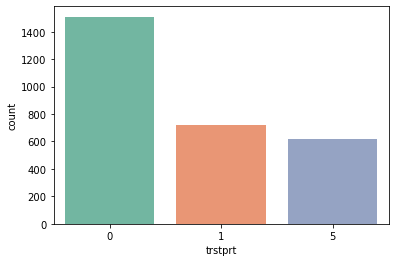

In [61]:
print(ess_de['trstprt'].value_counts())
sns.countplot(x='trstprt', data=ess_de, palette='Set2')
plt.show()

In [60]:
ess_de.loc[ess_de['trstprt'] == 88, 'trstprt'] = 5
ess_de.loc[ess_de['trstprt'] == 77, 'trstprt'] = 5

In [62]:
# calculate the number of 5 values to replace with 0 and 1
num_half = int(len(ess_de[ess_de['trstprt'] == 5]) / 2)
replace_indices_0 = np.random.choice(ess_de[ess_de['trstprt'] == 5].index, num_half, replace=False)
replace_indices_1 = np.random.choice(ess_de[ess_de['trstprt'] == 5].index, num_half, replace=False)

# replace half of the 5 values with 0 and the other half with 1
ess_de.loc[replace_indices_0, 'trstprt'] = 0
ess_de.loc[replace_indices_1, 'trstprt'] = 1

0    1819
1    1032
Name: trstprt, dtype: int64


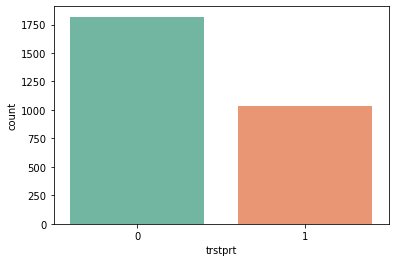

In [65]:
print(ess_de['trstprt'].value_counts())
sns.countplot(x='trstprt', data=ess_de, palette='Set2')
plt.show()

In [64]:
ess_de.loc[ess_de['trstprt'] == 5, 'trstprt'] = 0

In [66]:
x_data["trstprt"] = ess_de["trstprt"]

<ipython-input-66-154211be65e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_data["trstprt"] = ess_de["trstprt"]


9 - lrscale

5     1023
3      425
4      369
6      241
2      223
7      185
0      118
8       87
88      59
1       58
77      28
10      23
9       12
Name: lrscale, dtype: int64


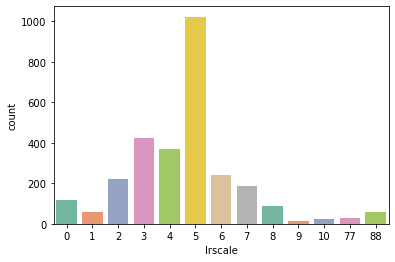

In [68]:
print(ess_de['lrscale'].value_counts())
sns.countplot(x='lrscale', data=ess_de, palette='Set2')
plt.show()

In [69]:
ess_de.loc[ess_de['lrscale'] == 1, 'lrscale'] = 0
ess_de.loc[ess_de['lrscale'] == 2, 'lrscale'] = 0
ess_de.loc[ess_de['lrscale'] == 3, 'lrscale'] = 0
ess_de.loc[ess_de['lrscale'] == 4, 'lrscale'] = 0
ess_de.loc[ess_de['lrscale'] == 6, 'lrscale'] = 1
ess_de.loc[ess_de['lrscale'] == 7, 'lrscale'] = 1
ess_de.loc[ess_de['lrscale'] == 8, 'lrscale'] = 1
ess_de.loc[ess_de['lrscale'] == 9, 'lrscale'] = 1
ess_de.loc[ess_de['lrscale'] == 10, 'lrscale'] = 1

0     1193
5     1023
1      548
88      59
77      28
Name: lrscale, dtype: int64


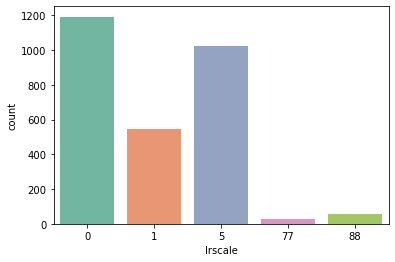

In [70]:
print(ess_de['lrscale'].value_counts())
sns.countplot(x='lrscale', data=ess_de, palette='Set2')
plt.show()

In [71]:
ess_de.loc[ess_de['lrscale'] == 77, 'lrscale'] = 88

In [72]:
# calculate the number of 88 values to replace with 0, 1, and 5
num_88_values = len(ess_de[ess_de['lrscale'] == 88])
num_replacements_0 = int(num_88_values * 0.33)
num_replacements_1 = int(num_88_values * 0.33)
num_replacements_5 = num_88_values - num_replacements_0 - num_replacements_1

# get the indices of the 88 values to replace with 0, 1, and 5
replace_indices_0 = np.random.choice(ess_de[ess_de['lrscale'] == 88].index, num_replacements_0, replace=False)
remaining_indices = [index for index in ess_de[ess_de['lrscale'] == 88].index if index not in replace_indices_0]
replace_indices_1 = np.random.choice(remaining_indices, num_replacements_1, replace=False)
remaining_indices = [index for index in remaining_indices if index not in replace_indices_1]
replace_indices_5 = np.random.choice(remaining_indices, num_replacements_5, replace=False)

# replace the 88 values with 0, 1, and 5
ess_de.loc[replace_indices_0, 'lrscale'] = 0
ess_de.loc[replace_indices_1, 'lrscale'] = 1
ess_de.loc[replace_indices_5, 'lrscale'] = 5

0    1221
5    1054
1     576
Name: lrscale, dtype: int64


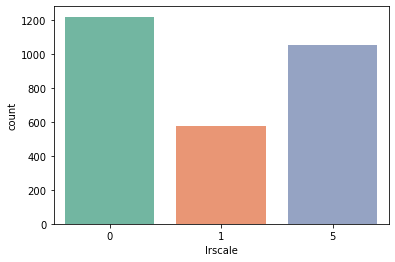

In [73]:
print(ess_de['lrscale'].value_counts())
sns.countplot(x='lrscale', data=ess_de, palette='Set2')
plt.show()

In [74]:
x_data["lrscale"] = ess_de["lrscale"]

<ipython-input-74-b1add56d9ff2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_data["lrscale"] = ess_de["lrscale"]


In [122]:
x_data.describe()

basinc       nwspol      polintr         vote      sgnptit  \
count  2851.000000  2851.000000  2851.000000  2851.000000  2851.000000   
mean      0.475272    67.178885     0.680814     0.850579     0.376359   
std       0.499476    84.174861     0.466243     0.356566     0.484557   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000    30.000000     0.000000     1.000000     0.000000   
50%       0.000000    60.000000     1.000000     1.000000     0.000000   
75%       1.000000    90.000000     1.000000     1.000000     1.000000   
max       1.000000  1200.000000     1.000000     1.000000     1.000000   

          pstplonl      trstplt      trstprt      lrscale       stfgov  \
count  2851.000000  2851.000000  2851.000000  2851.000000  2851.000000   
mean      0.222027     0.370747     0.361978     2.050509     0.529288   
std       0.415682     0.483090     0.480657     2.289467     0.499229   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     1.000000     1.000000   
75%       0.000000     1.000000     1.000000     5.000000     1.000000   
max       1.000000     1.000000     1.000000     5.000000     1.000000   

            stfdem      gincdif      gvslvue  
count  2851.000000  2851.000000  2851.000000  
mean      0.649597     0.800421     0.677306  
std       0.477180     0.399754     0.467589  
min       0.000000     0.000000     0.000000  
25%       0.000000     1.000000     0.000000  
50%       1.000000     1.000000     1.000000  
75%       1.000000     1.000000     1.000000  
max       1.000000     1.000000     1.000000

10 - stfgov

5     528
6     480
7     438
4     333
3     323
8     227
2     192
0     134
1      66
88     58
9      48
10     22
77      2
Name: stfgov, dtype: int64


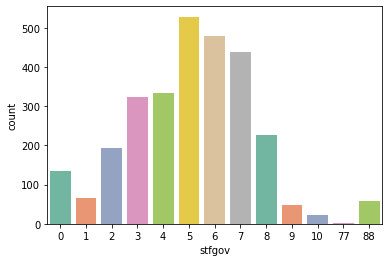

In [76]:
print(ess_de['stfgov'].value_counts())
sns.countplot(x='stfgov', data=ess_de, palette='Set2')
plt.show()

In [77]:
ess_de.loc[ess_de['stfgov'] == 1, 'stfgov'] = 0
ess_de.loc[ess_de['stfgov'] == 2, 'stfgov'] = 0
ess_de.loc[ess_de['stfgov'] == 3, 'stfgov'] = 0
ess_de.loc[ess_de['stfgov'] == 4, 'stfgov'] = 0
ess_de.loc[ess_de['stfgov'] == 6, 'stfgov'] = 1
ess_de.loc[ess_de['stfgov'] == 7, 'stfgov'] = 1
ess_de.loc[ess_de['stfgov'] == 8, 'stfgov'] = 1
ess_de.loc[ess_de['stfgov'] == 9, 'stfgov'] = 1
ess_de.loc[ess_de['stfgov'] == 10, 'stfgov'] = 1

1    1509
0    1342
Name: stfgov, dtype: int64


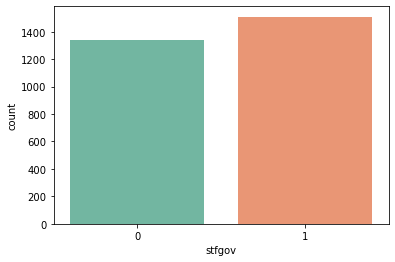

In [82]:
print(ess_de['stfgov'].value_counts())
sns.countplot(x='stfgov', data=ess_de, palette='Set2')
plt.show()

In [79]:
ess_de.loc[ess_de['stfgov'] == 77, 'stfgov'] = 5
ess_de.loc[ess_de['stfgov'] == 88, 'stfgov'] = 5

In [81]:
# count the number of 5 values in the column
num_fives = (ess_de['stfgov'] == 5).sum()

# calculate the number of 5 values to replace with 0
num_zeros = int(num_fives * 0.5)

# calculate the number of 5 values to replace with 1
num_ones = num_fives - num_zeros

# get the indices of the 5 values to replace with 0
zero_indices = np.random.choice(ess_de[ess_de['stfgov'] == 5].index, num_zeros, replace=False)

# get the indices of the remaining 5 values to replace with 1
ones_indices = np.setdiff1d(ess_de[ess_de['stfgov'] == 5].index, zero_indices)

# replace the 5 values with 0 and 1
ess_de.loc[zero_indices, 'stfgov'] = 0
ess_de.loc[ones_indices, 'stfgov'] = 1

In [83]:
x_data["stfgov"] = ess_de["stfgov"]

<ipython-input-83-be4fb2189b7a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_data["stfgov"] = ess_de["stfgov"]


11 - stfdem

8     533
7     426
5     384
6     362
4     260
3     237
9     232
2     139
10     93
0      92
1      65
88     26
77      2
Name: stfdem, dtype: int64


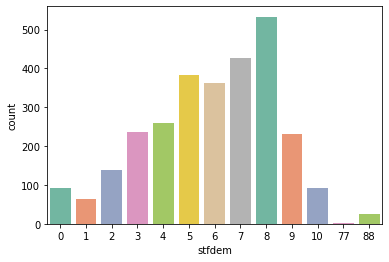

In [85]:
print(ess_de['stfdem'].value_counts())
sns.countplot(x='stfdem', data=ess_de, palette='Set2')
plt.show()

In [86]:
ess_de.loc[ess_de['stfdem'] == 1, 'stfdem'] = 0
ess_de.loc[ess_de['stfdem'] == 2, 'stfdem'] = 0
ess_de.loc[ess_de['stfdem'] == 3, 'stfdem'] = 0
ess_de.loc[ess_de['stfdem'] == 4, 'stfdem'] = 0
ess_de.loc[ess_de['stfdem'] == 6, 'stfdem'] = 1
ess_de.loc[ess_de['stfdem'] == 7, 'stfdem'] = 1
ess_de.loc[ess_de['stfdem'] == 8, 'stfdem'] = 1
ess_de.loc[ess_de['stfdem'] == 9, 'stfdem'] = 1


In [89]:
ess_de.loc[ess_de['stfdem'] == 10, 'stfdem'] = 1
ess_de.loc[ess_de['stfdem'] == 77, 'stfdem'] = 5
ess_de.loc[ess_de['stfdem'] == 88, 'stfdem'] = 5

1    1852
0     999
Name: stfdem, dtype: int64


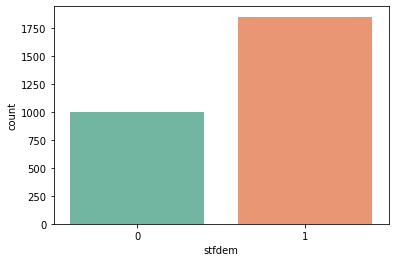

In [92]:
print(ess_de['stfdem'].value_counts())
sns.countplot(x='stfdem', data=ess_de, palette='Set2')
plt.show()

In [91]:
# count the number of 5 values in the column
num_fives = (ess_de['stfdem'] == 5).sum()

# calculate the number of 5 values to replace with 0
num_zeros = int(num_fives * 0.5)

# calculate the number of 5 values to replace with 1
num_ones = num_fives - num_zeros

# get the indices of the 5 values to replace with 0
zero_indices = np.random.choice(ess_de[ess_de['stfdem'] == 5].index, num_zeros, replace=False)

# get the indices of the remaining 5 values to replace with 1
ones_indices = np.setdiff1d(ess_de[ess_de['stfdem'] == 5].index, zero_indices)

# replace the 5 values with 0 and 1
ess_de.loc[zero_indices, 'stfdem'] = 0
ess_de.loc[ones_indices, 'stfdem'] = 1

In [93]:
x_data["stfdem"] = ess_de["stfdem"]

<ipython-input-93-efa4d731ceb6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_data["stfdem"] = ess_de["stfdem"]


12 - gincdif

2    1301
1     776
3     386
4     319
5      45
8      19
7       5
Name: gincdif, dtype: int64


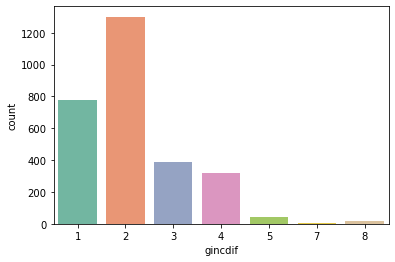

In [95]:
print(ess_de['gincdif'].value_counts())
sns.countplot(x='gincdif', data=ess_de, palette='Set2')
plt.show()

In [98]:
ess_de.loc[ess_de['gincdif'] == 2, 'gincdif'] = 1
ess_de.loc[ess_de['gincdif'] == 4, 'gincdif'] = 0
ess_de.loc[ess_de['gincdif'] == 5, 'gincdif'] = 0
ess_de.loc[ess_de['gincdif'] == 7, 'gincdif'] = 3
ess_de.loc[ess_de['gincdif'] == 8, 'gincdif'] = 3

In [104]:
ess_de["gincdif"].describe()

count    2851.000000
mean        0.764995
std         0.426551
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: gincdif, dtype: float64

1.0    2282
0.0     569
Name: gincdif, dtype: int64


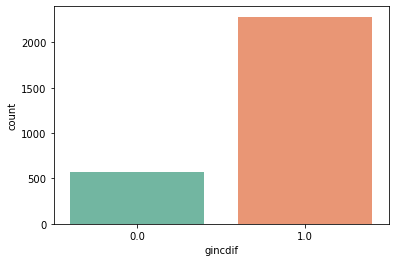

In [109]:
print(ess_de['gincdif'].value_counts())
sns.countplot(x='gincdif', data=ess_de, palette='Set2')
plt.show()

In [102]:
# count number of 3's in the column
num_threes = (ess_de['gincdif'] == 3).sum()

# create array of new values for the column
new_vals = np.concatenate((np.zeros(num_threes // 2), np.ones(num_threes // 2), np.full(num_threes - (num_threes // 2) * 2, 3)))

# shuffle the array of new values
np.random.shuffle(new_vals)

# replace 3's with the new values
ess_de.loc[ess_de['gincdif'] == 3, 'gincdif'] = new_vals

In [105]:
ess_de.loc[ess_de['gincdif'] == 3, 'gincdif'] = 1

In [108]:
#to correct mistaken distribution of 3s.
import random

# get the indices of rows that have 0 value in the column gincdif
zero_indices = ess_de.index[ess_de['gincdif'] == 0].tolist()

# randomly select 103 indices
random.seed(123) # set random seed for reproducibility
selected_indices = random.sample(zero_indices, 103)

# change the value of selected rows to 1
ess_de.loc[selected_indices, 'gincdif'] = 1

In [110]:
x_data["gincdif"] = ess_de["gincdif"]

<ipython-input-110-9bf5d9fc2066>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_data["gincdif"] = ess_de["gincdif"]


13 - gvslvue

5     664
7     448
8     414
6     398
4     239
3     225
10    203
9     120
2      68
0      28
88     27
1      13
77      4
Name: gvslvue, dtype: int64


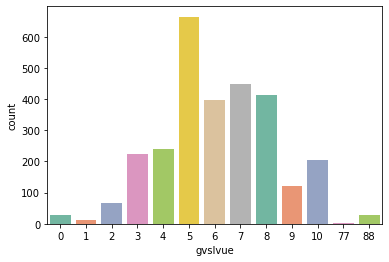

In [111]:
print(ess_de['gvslvue'].value_counts())
sns.countplot(x='gvslvue', data=ess_de, palette='Set2')
plt.show()

In [112]:
ess_de.loc[ess_de['gvslvue'] == 1, 'gvslvue'] = 0
ess_de.loc[ess_de['gvslvue'] == 2, 'gvslvue'] = 0
ess_de.loc[ess_de['gvslvue'] == 3, 'gvslvue'] = 0

In [113]:
ess_de.loc[ess_de['gvslvue'] == 6, 'gvslvue'] = 1
ess_de.loc[ess_de['gvslvue'] == 7, 'gvslvue'] = 1
ess_de.loc[ess_de['gvslvue'] == 8, 'gvslvue'] = 1
ess_de.loc[ess_de['gvslvue'] == 9, 'gvslvue'] = 1
ess_de.loc[ess_de['gvslvue'] == 10, 'gvslvue'] = 1

In [114]:
ess_de.loc[ess_de['gvslvue'] == 77, 'gvslvue'] = 5
ess_de.loc[ess_de['gvslvue'] == 88, 'gvslvue'] = 5

In [116]:
ess_de.loc[ess_de['gvslvue'] == 4, 'gvslvue'] = 0

1    1931
0     920
Name: gvslvue, dtype: int64


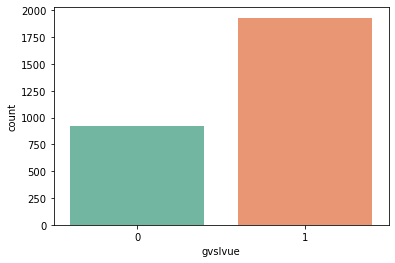

In [119]:
print(ess_de['gvslvue'].value_counts())
sns.countplot(x='gvslvue', data=ess_de, palette='Set2')
plt.show()

In [118]:
# Count the number of 5s in the column
num_fives = ess_de['gvslvue'].value_counts()[5]

# Calculate the number of 5s to be replaced with 0 and 1
num_zeros = num_fives // 2
num_ones = num_fives - num_zeros

# Get the indices of the 5s in the column
five_indices = ess_de.index[ess_de['gvslvue'] == 5].tolist()

# Shuffle the indices randomly
random.shuffle(five_indices)

# Replace half of the 5s with 0 and the other half with 1
for i in range(num_zeros):
    ess_de.at[five_indices[i], 'gvslvue'] = 0
for i in range(num_zeros, num_zeros+num_ones):
    ess_de.at[five_indices[i], 'gvslvue'] = 1

In [120]:
x_data ["gvslvue"] = ess_de["gvslvue"]

<ipython-input-120-67d4304dfc57>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_data ["gvslvue"] = ess_de["gvslvue"]


In [123]:
x_data.describe()

basinc       nwspol      polintr         vote      sgnptit  \
count  2851.000000  2851.000000  2851.000000  2851.000000  2851.000000   
mean      0.475272    67.178885     0.680814     0.850579     0.376359   
std       0.499476    84.174861     0.466243     0.356566     0.484557   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000    30.000000     0.000000     1.000000     0.000000   
50%       0.000000    60.000000     1.000000     1.000000     0.000000   
75%       1.000000    90.000000     1.000000     1.000000     1.000000   
max       1.000000  1200.000000     1.000000     1.000000     1.000000   

          pstplonl      trstplt      trstprt      lrscale       stfgov  \
count  2851.000000  2851.000000  2851.000000  2851.000000  2851.000000   
mean      0.222027     0.370747     0.361978     2.050509     0.529288   
std       0.415682     0.483090     0.480657     2.289467     0.499229   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     1.000000     1.000000   
75%       0.000000     1.000000     1.000000     5.000000     1.000000   
max       1.000000     1.000000     1.000000     5.000000     1.000000   

            stfdem      gincdif      gvslvue  
count  2851.000000  2851.000000  2851.000000  
mean      0.649597     0.800421     0.677306  
std       0.477180     0.399754     0.467589  
min       0.000000     0.000000     0.000000  
25%       0.000000     1.000000     0.000000  
50%       1.000000     1.000000     1.000000  
75%       1.000000     1.000000     1.000000  
max       1.000000     1.000000     1.000000

In [124]:
x_data.to_csv('pol_var_de.csv', index=False)